In [12]:
%pylab inline
import xarray as xr
import pandas as pd
import ocean_data_tools as odt
import cartopy as ctp

Populating the interactive namespace from numpy and matplotlib


In [13]:
xds = xr.open_dataset('../reccap2ocean_regions.nc')

In [27]:
def make_fig(xda, **kwargs):
    ax = xda.plot_map(proj=ctp.crs.PlateCarree(180), **kwargs)
    fig = ax.get_figure()
    return fig, ax

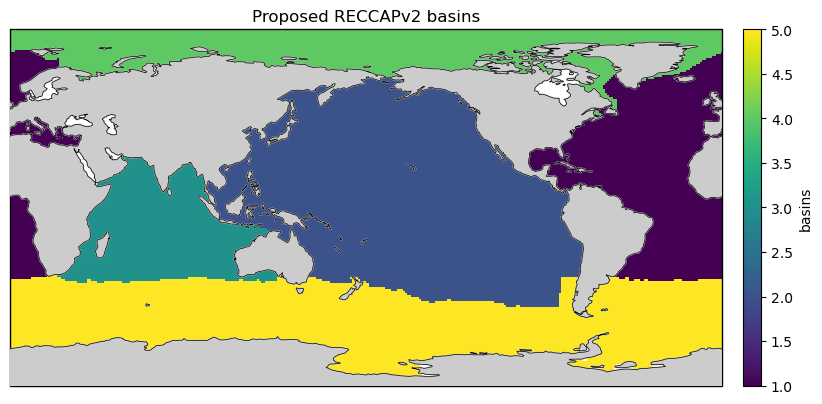

In [23]:
fig, ax = make_fig(xds.basins)
ax.set_title('Proposed RECCAPv2 basins')
fig.savefig('../basins.png', bbox_inches='tight', dpi=150)

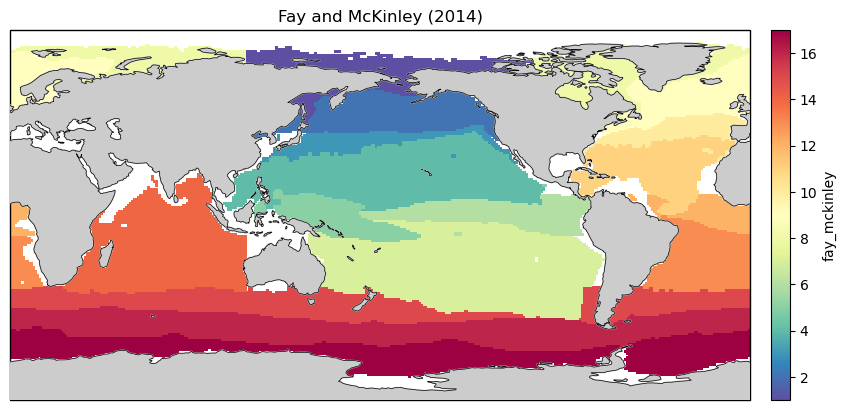

In [30]:
fig, ax = make_fig(xds.fay_mckinley, cmap=cm.Spectral_r)
ax.set_title('Fay and McKinley (2014)')
fig.savefig('../fm14.png', bbox_inches='tight', dpi=150)

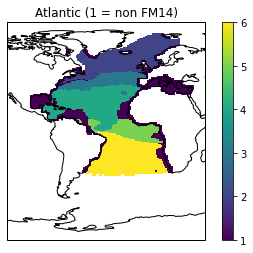

In [51]:
atl = xr.concat([xds.atlantic.sel(lon=slice(250, 360)), xds.atlantic.sel(lon=slice(0, 40))], dim='lon')

ax = axes(projection=ctp.crs.PlateCarree())
fig = ax.get_figure()
x = atl.lon.values
y = atl.lat.values
img = ax.pcolormesh(x, y, atl.values)
ax.coastlines()
ax.set_title('Atlantic (1 = non FM14)')
cbar = colorbar(img)
fig.savefig('../img/atlantic.png', bbox_inches='tight', dpi=150)

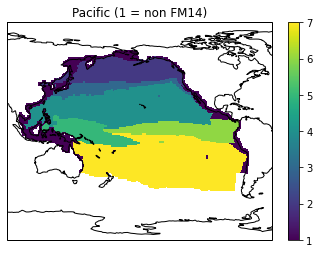

In [59]:
pac = xds.pacific.sel(lon=slice(100, 300))

ax = axes(projection=ctp.crs.PlateCarree(180))
fig = ax.get_figure()
x = pac.lon.values
y = pac.lat.values
img = ax.pcolormesh(x, y, atl.values, transform=ctp.crs.PlateCarree(), vmax=7)
ax.coastlines()
ax.set_title('Pacific (1 = non FM14)')
cbar = colorbar(img)
fig.savefig('../img/pacific.png', bbox_inches='tight', dpi=150)

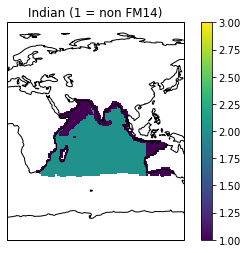

In [63]:
ind = xds.indian.sel(lon=slice(0, 140))

ax = axes(projection=ctp.crs.PlateCarree(180))
fig = ax.get_figure()
x = ind.lon.values
y = ind.lat.values
img = ax.pcolormesh(x, y, ind.values, transform=ctp.crs.PlateCarree())
ax.coastlines()
ax.set_title('Indian (1 = non FM14)')
cbar = colorbar(img)
fig.savefig('../img/indian.png', bbox_inches='tight', dpi=150)

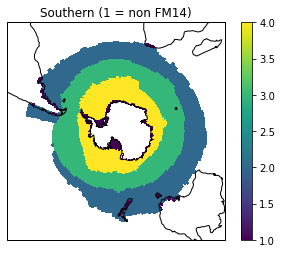

In [70]:
ind = xds.southern.sel(lat=slice(-90, -30))

ax = axes(projection=ctp.crs.SouthPolarStereo())
fig = ax.get_figure()
x = ind.lon.values
y = ind.lat.values
img = ax.pcolormesh(x, y, ind.where(ind>0).values, transform=ctp.crs.PlateCarree())
ax.coastlines()
ax.set_title('Southern (1 = non FM14)')
cbar = colorbar(img)
fig.savefig('../img/southern.png', bbox_inches='tight', dpi=150)

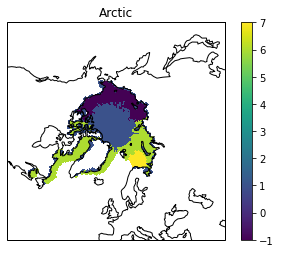

In [78]:
arc = xds.arctic.sel(lat=slice(45, 90))

ax = axes(projection=ctp.crs.NorthPolarStereo())
fig = ax.get_figure()
x = arc.lon.values
y = arc.lat.values
img = ax.pcolormesh(x, y, arc.where(arc>-8).values, transform=ctp.crs.PlateCarree())
ax.coastlines()
ax.set_title('Arctic')
cbar = colorbar(img)
fig.savefig('../img/bas_arctic.png', bbox_inches='tight', dpi=150)

In [84]:
xda = xr.open_dataset('../reccap2coastal_coscats.nc').continental_shelf

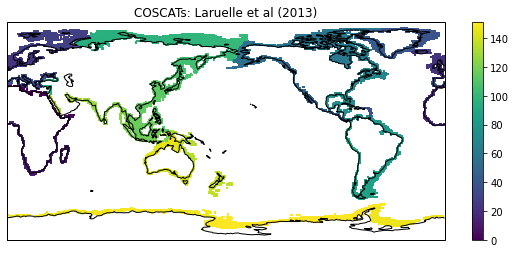

In [91]:
fig = figure(figsize=[10, 4])
ax = axes(projection=ctp.crs.PlateCarree(180))

x = xda.longitude.values
y = xda.latitude.values
img = ax.pcolormesh(x, y, xda.values, transform=ctp.crs.PlateCarree())
ax.coastlines()
ax.set_title('COSCATs: Laruelle et al (2013)')
cbar = colorbar(img)
fig.savefig('../img/coasts.png', bbox_inches='tight', dpi=150)